In [1]:
import pandas as pd
import urllib
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
filename = 'Colab Notebooks/Titanic-Dataset.csv'
path = Path('/content/drive/MyDrive')
data_file = path / filename
df = pd.read_csv(data_file)
df.info()

Mounted at /content/drive/
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.fillna({
    'Cabin': 'unknown',
    'Embarked': df.Embarked[0],
    'Age': round(df.Age.mean()),
    }, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<ipython-input-6-7240e7334b93>:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for pclass, items in df.groupby(by=['age_groups']):


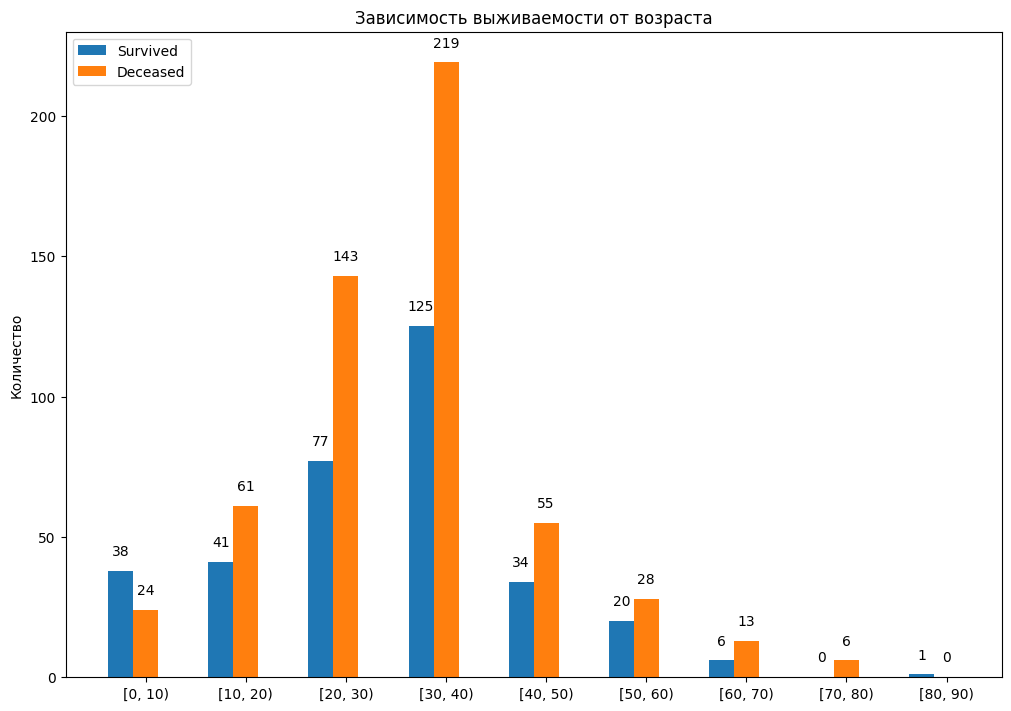

In [6]:
def extract_age_groups(age):
    lower_bound, upper_bound = int(math.floor(age / 10) * 10), int(math.ceil(age / 10) * 10)
    upper_bound = upper_bound + 10 if lower_bound == upper_bound else upper_bound
    return f'[{lower_bound}, {upper_bound})'
df['age_groups'] = df.Age.apply(extract_age_groups)


classes = []
groups = {'Survived': [], 'Deceased': []}
for pclass, items in df.groupby(by=['age_groups']):
    count0 = items[items['Survived'] == 0]['Survived'].count()
    count1 = items[items['Survived'] == 1]['Survived'].count()
    groups['Deceased'].append(count0)
    groups['Survived'].append(count1)
    classes.append(pclass)

x = np.arange(len(classes))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(10, 7))

for attribute, measurement in groups.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=len(classes))
    multiplier += 1

ax.set_ylabel('Количество')
ax.set_title('Зависимость выживаемости от возраста')
ax.set_xticks(x + width, classes)
ax.legend(loc='upper left')

plt.show()
